
# **Оцінка якості навчання нейронної мережі в Keras**
На прикладі розпізнавання рукописних цифр з набору даних MNIST.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from tensorflow.python.keras.optimizers import Adam, RMSprop

Підготовка даних для навчання мережі

Завантажуємо набір даних з рукописними цифрами


In [9]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

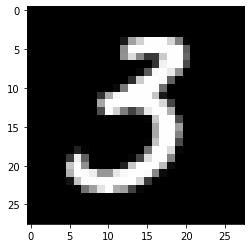

In [10]:
n = 789
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()


Перетворення розмірності даних в наборі

In [11]:
print(x_train_org[n])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25 161 209 254 254 255
  212 128   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 143 254 254 254 254 254
  254 254  93   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 146 220 136  56  56 204
  254 254 103   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 241
  254 254  75   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   8  9

In [12]:
print(y_train_org[n])

3


In [29]:
#x_train = x_train_org.reshape(60000, 784)
#x_test = x_test_org.reshape(10000, 784)
x_train[1]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Нормалізація даних

In [14]:
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32')
x_test = x_test / 255 

Робота з правильними відповідями

In [15]:
print(y_test_org[n])

4



Перетворимо мітки в формат one hot encoding

In [16]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)


Правильна відповідь в форматі one hot encoding

In [17]:
print(y_test[n])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Створюємо нейронну мережу
Створюємо послідовну модель


In [ ]:
model = Sequential()


Додаємо рівні мережі

Архітектуру мережі взяли за посиланням - https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()


Компілюємо мережу

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())


Навчаємо нейронну мережу

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=256, 
                    epochs=10,
                    verbose=1)


Перевіряємо якість навчання на тестовому наборі даних

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

In [ ]:
scores

In [ ]:
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

# Перевірочна вибірка

In [ ]:
model = Sequential()

model.add(Dense(100, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

In [ ]:
model = Sequential()

model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 40000

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

**Візуалізація якості навчання**

Склад словника History

In [ ]:
print(history.history.keys())


Друкуємо значення помилки на навчальному наборі даних

In [ ]:
history.history['loss']

Друкуємо частку правильних відповідей на перевірочному наборі даних

In [ ]:
history.history['val_accuracy']

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], 
         label='Помилка на навчальному наборі')
plt.plot(history.history['val_loss'], 
         label='Помилка на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Помилка')
plt.legend()
plt.show()

# Перенавчання
Без Dropout

In [ ]:
y_train[20000:]

In [ ]:
model = Sequential()

model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

Стрибки на перших епохах свідчать про те, що модель "перестрибує" мінімуми. На навчальній вибірці маємо 100% точність, на перевірочній - лише 60%.

**Dropout 30%**

In [ ]:
model = Sequential()

model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

#model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

Отримали, що без дропаута точність на перевірочній вибірці була 60%, а з дропаутом (0.3) вона підвищилася і стала 66%.

**Dropout 80%**

In [ ]:
model = Sequential()

model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

Отримали, що при дропауті(0.8) точність на перевірочній вибірці дорівнює 60% - така ж як і без дропаута. Проте зараз точність на навчальній вибірці різко зменшилася і сильно коливається.

**Dropout 10%**

In [ ]:
model = Sequential()

model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

З дропаутом(0.1) точність на навчальній вибірці 100%, на перевірочній вибірці 68%, без дропаута була 60%.

# Нормалізація за міні-батчами

In [ ]:
model = Sequential()

model.add(Dense(400, input_dim=784, activation="relu"))
model.add(BatchNormalization())
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

# Функції активації

In [ ]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="softmax"))
#model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'], 
         label='Доля вірних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

# Усереднення точності мережі за кількома ітераціями

In [ ]:
valAcc = []
iterations = 10

for i in range(iterations):
    model = Sequential()

    # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
    model.add(Dense(10, input_dim=784, activation="relu"))
    #model.add(Dropout(0.2))
    # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, 
                        y_train, 
                        batch_size=200, 
                        epochs=5,
                        validation_split=0.2,
                        verbose=0)
  
    currAcc = history.history['val_accuracy'][-1]
    valAcc.append(currAcc)
    print("Запуск", i, "точність", currAcc)

In [ ]:
valAcc = np.array(valAcc)
meanAcc = sum(valAcc) / valAcc.shape[0]
print(meanAcc)
print(max(valAcc) - min(valAcc))


# Запуск декількох мереж

In [ ]:
def evaluateModel(model, batchSize, epohs, valSplit):
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, 
                        y_train, 
                        batch_size=batchSize, 
                        epochs=epohs,
                        validation_split=valSplit,
                        verbose=0)
  
    currAcc = history.history['val_accuracy'][-1]
  
    return currAcc, history


In [ ]:
models = []

model = Sequential()
model.add(Dense(10, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(20, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(30, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

batchSisez = [100, 200, 300]

acc = []
hist = []
for i in range(len(models)):
    currAcc, currHistory = evaluateModel(models[i], batchSisez[i], 5, 0.2)
    acc.append(currAcc)
    hist.append(currHistory)
print(acc)

In [ ]:
print(hist[0].history['val_accuracy'])

# Load my picture

In [18]:
from tensorflow.keras.callbacks import *

checkpoint = ModelCheckpoint("model4.dump", monitor='val_loss', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')


In [27]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=30,
                    validation_split=0.2,
                    callbacks=[checkpoint],
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 735,018
Trainable params: 733,418
Non-trainable params: 1,600
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47600/48000 [============================>.] - ET

Epoch 26/30
47600/48000 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9955
Epoch 00026: val_loss did not improve from 0.10397
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.1543 - val_accuracy: 0.9754
Epoch 27/30
47400/48000 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9958
Epoch 00027: val_loss did not improve from 0.10397
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.1511 - val_accuracy: 0.9758
Epoch 28/30
47400/48000 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9971
Epoch 00028: val_loss did not improve from 0.10397
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.1455 - val_accuracy: 0.9774
Epoch 29/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979
Epoch 00029: val_loss did 

In [20]:
model.load_weights("model4.dump")

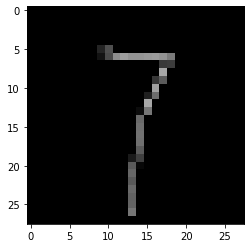

In [26]:
from PIL import Image

img = Image.open('7_2.png').convert("L")
plt.imshow(img.convert('RGBA'))
plt.show()

In [22]:
pix = np.array(img)
print(pix)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  36  79   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19  74 141 158 147 147 151 154 146
  123   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  57
   60   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [23]:
pix = pix.reshape(1, 784)
pix = pix.astype('float32')
pix = pix / 255 

In [24]:
y_pred = model.predict_classes(pix)
print(y_pred)

[7]


In [47]:
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})

y_pred = model.predict(pix)
print(y_pred)

[[0.000268355 0.11825 0.00155931 0.0116662 0.000983592 0.854674
  9.19272e-05 0.0114322 1.62749e-05 0.00105797]]
